In [51]:
!pip install tensorflow

## 1. Load and Preprocess the MNIST Dataset

(60000, 28, 28)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


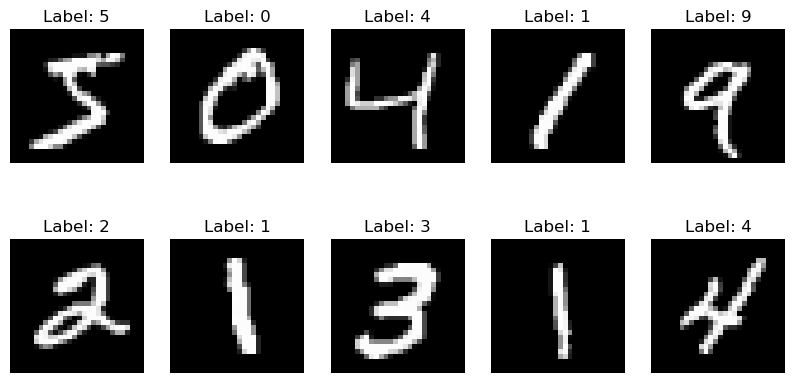

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Comment: Loading in the MNIST library from tensorflow to initiate variables for data, as well as the amount of pictures and size
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

#Comment: Change the image type from unsinged integers to floating point for better precision and scaling it between 0.0 and 255.0 pixels
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#Comment: Reshape the training images to fit pixels into a 28x28 array to allow neural network to have total 784 neurons, 
# then display training and testing variable information
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)


print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

#Comment: Create a figure to display first 10 images using a gray cmap and resizing to make sure images fit figure as well 
# to see the integers better
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## Build the Neural Network Model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Build the neural network model
#Write you code here. Define "model" using Sequential, Input and Dense
#Simple sequential model that takes the input of an array shape of 784 pixels, while having a hidden layer of 8 nodes using the reLU algo
#Final layer is a output layer of ten nodes, with softmax activation to have a percentage between 0 and 1
model = Sequential([
    Input(shape=(784,)),
    Dense(8, activation="relu"),
    Dense(10, activation="softmax")
])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,370 (24.88 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Neural Network

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.7414 - loss: 0.8610 - val_accuracy: 0.9093 - val_loss: 0.3284
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.9092 - loss: 0.3213 - val_accuracy: 0.9155 - val_loss: 0.2992
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.9194 - loss: 0.2886 - val_accuracy: 0.9176 - val_loss: 0.2870
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.9222 - loss: 0.2787 - val_accuracy: 0.9237 - val_loss: 0.2780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.9238 - loss: 0.2720 - val_accuracy: 0.9239 - val_loss: 0.2725
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.9265 - loss: 0.2621 - val_accuracy: 0.9241 - val_loss: 0.2723
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.9268 - loss: 0.2552 - val_accuracy: 0.9269 - val_loss: 0.2627
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.9288 -

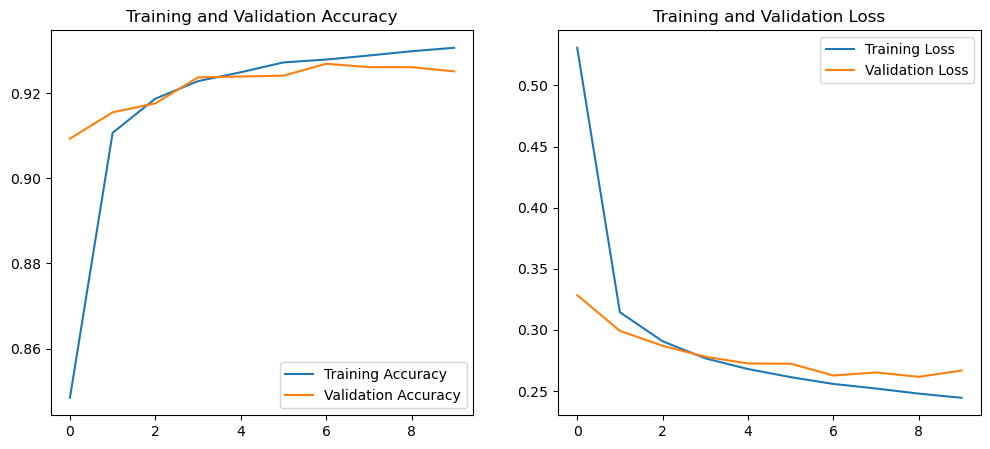

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Comment: Adam() is an optimizing algorithm to minimize the loss function by finding the lowest possible error and updating
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Comment: ModelCheckpoint is used to keep track of the best version of the model by finding the best value of 'val_accuracy'
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# Comment: Create and train the testing model which will use ModelCheckpoint to keep track of the best version
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint]
)

# Comment: Create a figure that shows the comparison between training and validation acurracy 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Comment: Create another graph for the figure to represent the comparison between training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.9184 - loss: 0.2868
Test Accuracy: 0.9269
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.95      0.90      0.92      1032
           3       0.91      0.93      0.92      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.94      0.93       958
           7       0.94      0.94      0.94      1028
           8       0.88      0.87      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



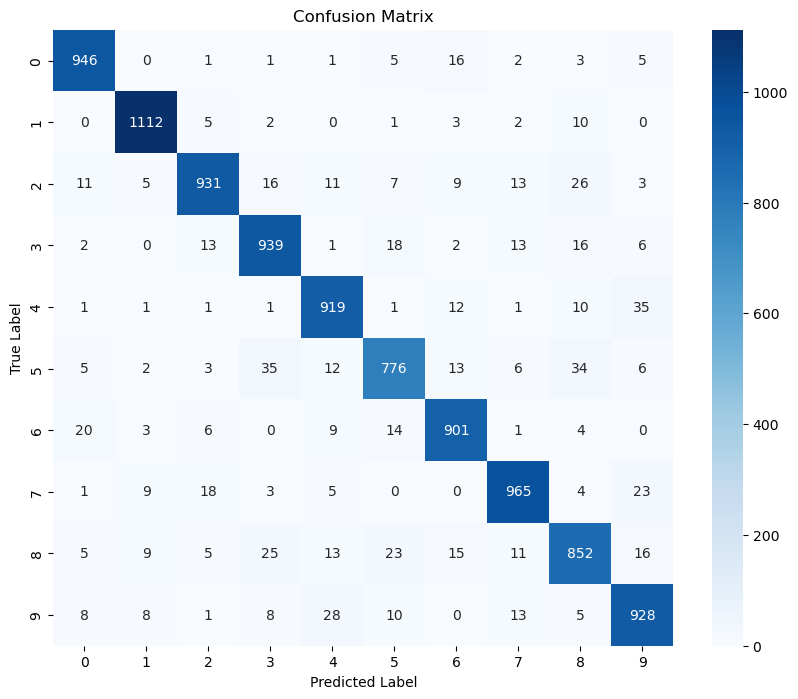

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


best_model = tf.keras.models.load_model('best_model.keras')

#Comment: Using Keras, after training the model apply the test set and display the accuracy
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

#Comment: Use the trained model to predict the probabilities of X_test and print
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

#Comment: Create a confusion matrix to display the prediction values with labels
cm = confusion_matrix(y_test, y_pred_classes)

#Comment: Using the confusion matrix in a figure, setup up x and y axis to display information
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Visualize Predictions

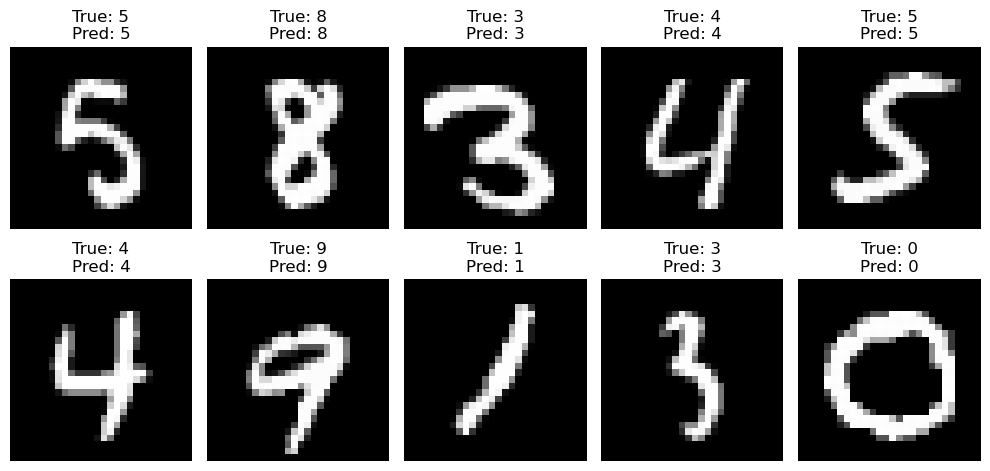

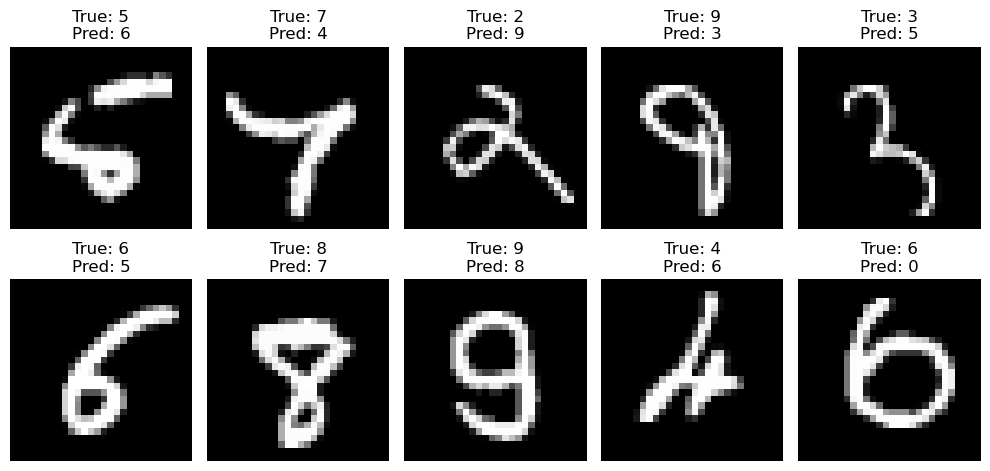

In [61]:
#Comment: Pick 10 random index from the testing set
indices = np.random.choice(len(X_test), 10, replace=False)

#Comment: Create a figure that holds 10 images of the correctly predicted elements
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Comment: This array is used to saved all indices where the model incorrectly predicted
incorrect_indices = np.where(y_test != y_pred_classes)[0]

#Comment: Create another figure to display the indices where the model incorrectly predicted, as well as the true and predicted labels using a gray cmap
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Part 3: Experimenting with a Larger Hidden Layer (20 Marks)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 - loss: 0.4344 - val_accuracy: 0.9584 - val_loss: 0.1413
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9618 - loss: 0.1316 - val_accuracy: 0.9685 - val_loss: 0.1064
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9757 - loss: 0.0811 - val_accuracy: 0.9704 - val_loss: 0.0949
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.9816 - loss: 0.0619 - val_accuracy: 0.9755 - val_loss: 0.0803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.9862 - loss: 0.0441 - val_accuracy: 0.9775 - val_loss: 0.0720
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9771 - val_loss: 0.0758
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9785 - val_loss: 0.0745
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9934 - loss: 0

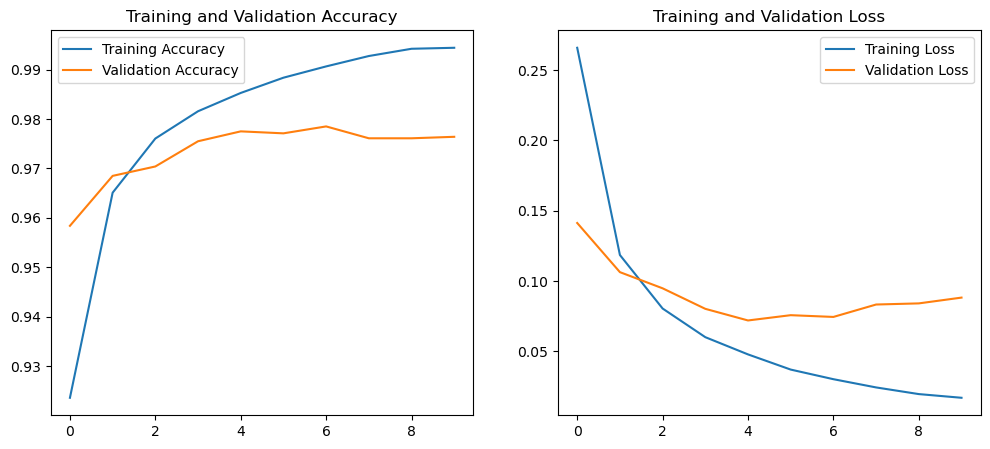

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9756 - loss: 0.0893
Test Accuracy: 0.9785
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



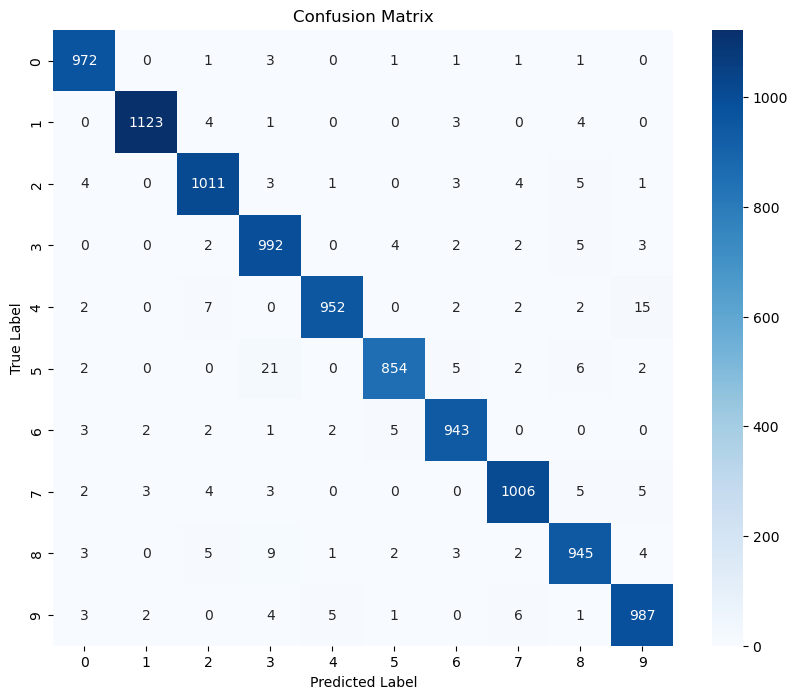

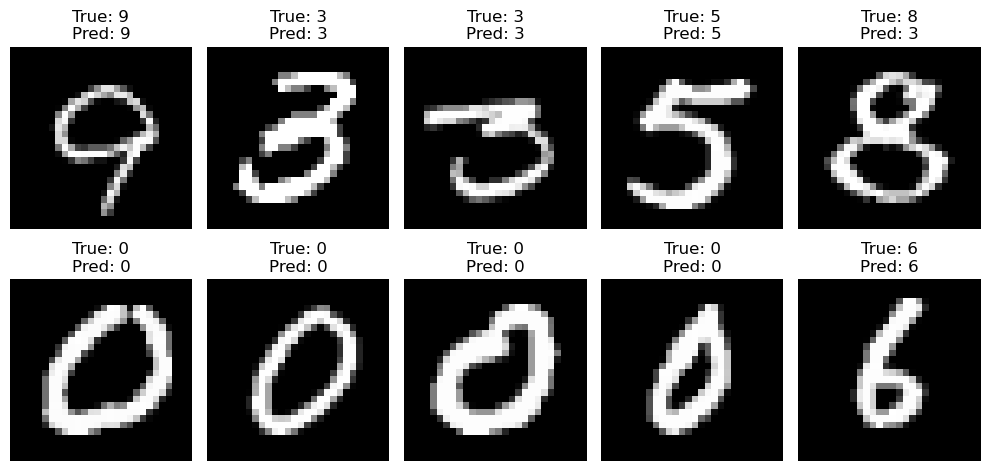

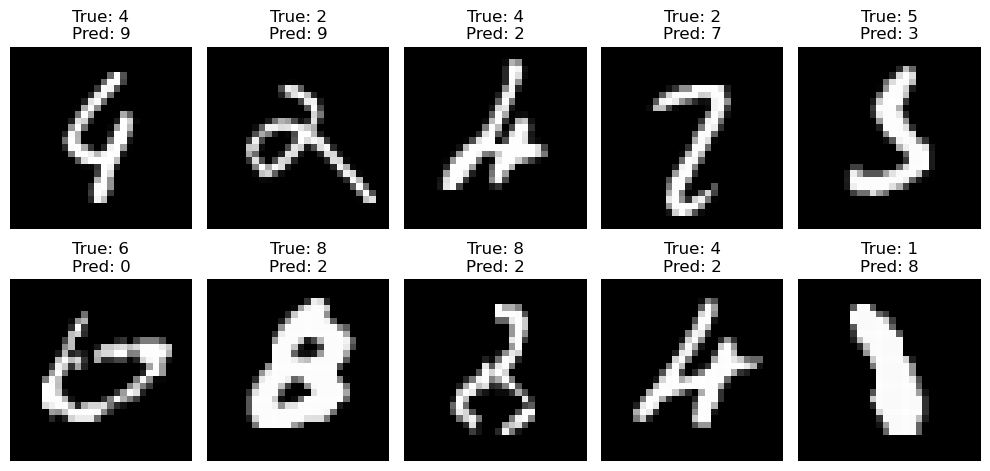

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])
model.summary()

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint]
)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


best_model = tf.keras.models.load_model('best_model.keras')

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



indices = np.random.choice(len(X_test), 10, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

incorrect_indices = np.where(y_test != y_pred_classes)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



## Part 4: Custom Neural Network for 99% average F1 Score (10 Marks)


(60000, 28, 28)
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9203 - loss: 0.2602 - val_accuracy: 0.9861 - val_loss: 0.0428
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9863 - loss: 0.0465 - val_accuracy: 0.9887 - val_loss: 0.0326
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9903 - val_loss: 0.0315
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9931 - loss: 0.0206 - val_accuracy: 0.9907 - val_loss: 0.0291
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9913 - val_loss: 0.0271
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9899 - val_loss: 0.0364
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9925 - val_loss: 0.0292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9978 - loss: 0.0071 - va

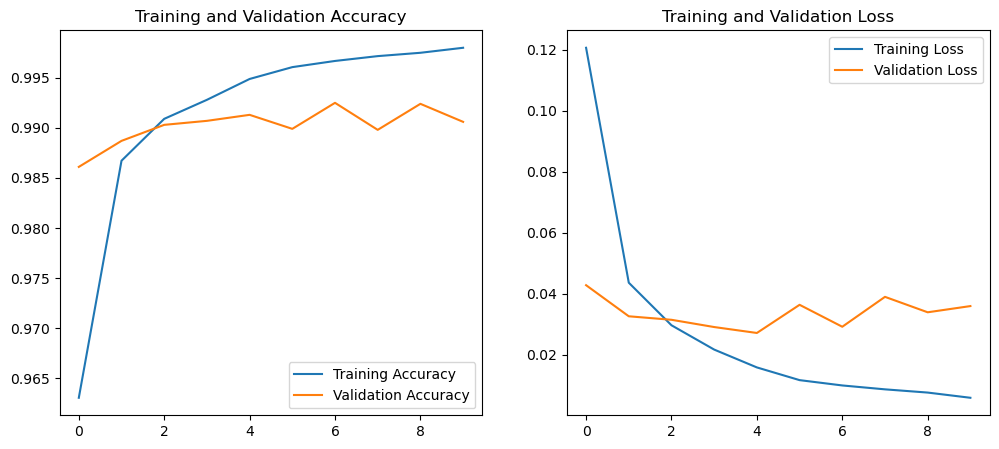

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9909 - loss: 0.0360
Test Accuracy: 0.9925
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



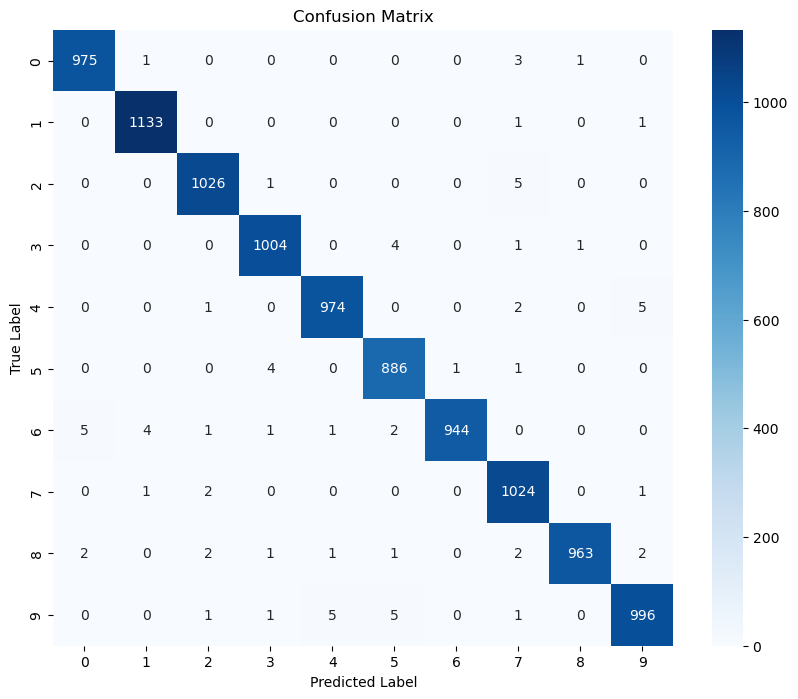

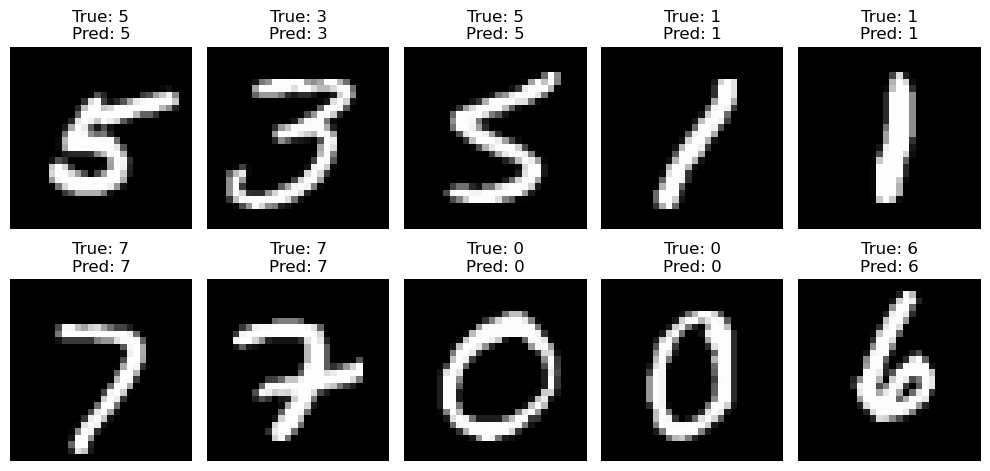

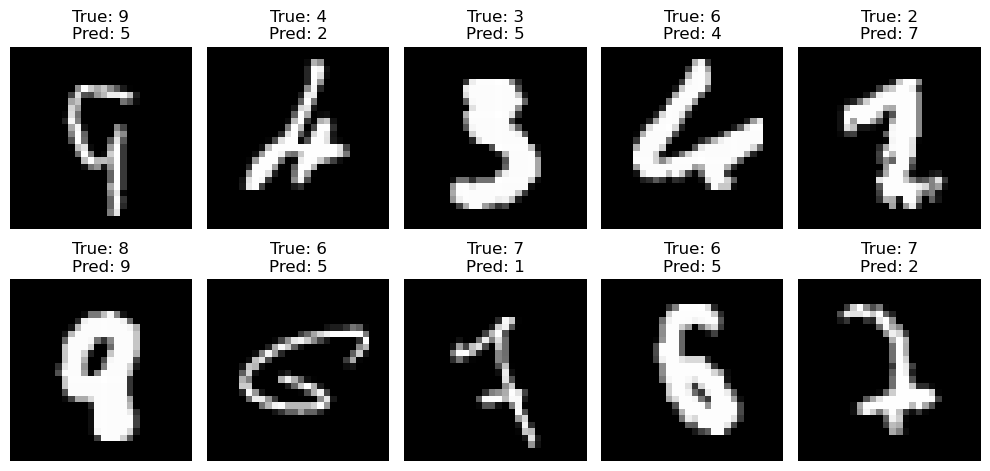

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint]
)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


best_model = tf.keras.models.load_model('best_model.keras')

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



indices = np.random.choice(len(X_test), 10, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

incorrect_indices = np.where(y_test != y_pred_classes)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
